# Electricity prices EDA

In [2]:
import os
print(f'Current working dir:\t {os.getcwd()}')
from pathlib import Path

from datetime import datetime
# from datetime import timedelta

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib widget

Current working dir:	 c:\GitRepos\various-data-analysis\electricity-prices


In [3]:
filename = Path("Rocni_zprava_o_trhu_2021_V0.csv")
root_data = Path("D:/DATA_FAST/electricity")
# read only header first for prep on parsing and stuff
cols_from_header = pd.read_csv(root_data / filename, nrows=0).columns.tolist()
# # parse_dates = ['begins_at', 'ends_at', 'created_at', 'updated_at', 'expired_at', 'paid_at']
# # data_raw = pd.read_csv(filename, index_col='id', parse_dates=parse_dates).drop(columns=['payment_id'])
data_raw = pd.read_csv(root_data / filename, parse_dates=['Den']) #.drop(columns=['payment_id'])
data_raw = data_raw.dropna()
data_raw


,Den,Hodina,CZK/MWh
0,2021-01-01,1,1195.20
1,2021-01-01,2,1091.53
2,2021-01-01,3,1051.11
3,2021-01-01,4,968.44
4,2021-01-01,5,904.67
...,...,...,...
8755,2021-12-31,20,2303.53
8756,2021-12-31,21,2287.12
8757,2021-12-31,22,1939.83
8758,2021-12-31,23,1732.74


In [11]:
# data_raw.Den.apply(datetime.replace, hour=data_raw.Hodina)
# data_raw.Den.replace(hour=data_raw.Hodina)
df = pd.DataFrame()
df['date'] = pd.to_datetime(data_raw['Den'])
df['date'] += pd.to_timedelta(data_raw['Hodina'], unit='h')
df['month'] = data_raw['Den'].apply(lambda date: date.month)
df['hour'] = data_raw['Hodina']
df['price'] = data_raw['CZK/MWh']
df.set_index('date')
df.describe()

,month,hour,price
count,8760.000000,8760.000000,8760.000000
mean,6.526826,12.500114,2570.347473
std,3.448042,6.922780,1809.585212
min,1.000000,1.000000,-945.840000
25%,4.000000,6.750000,1478.480000
50%,7.000000,12.500000,1979.705000
75%,10.000000,18.250000,2901.105000
max,12.000000,25.000000,15648.800000


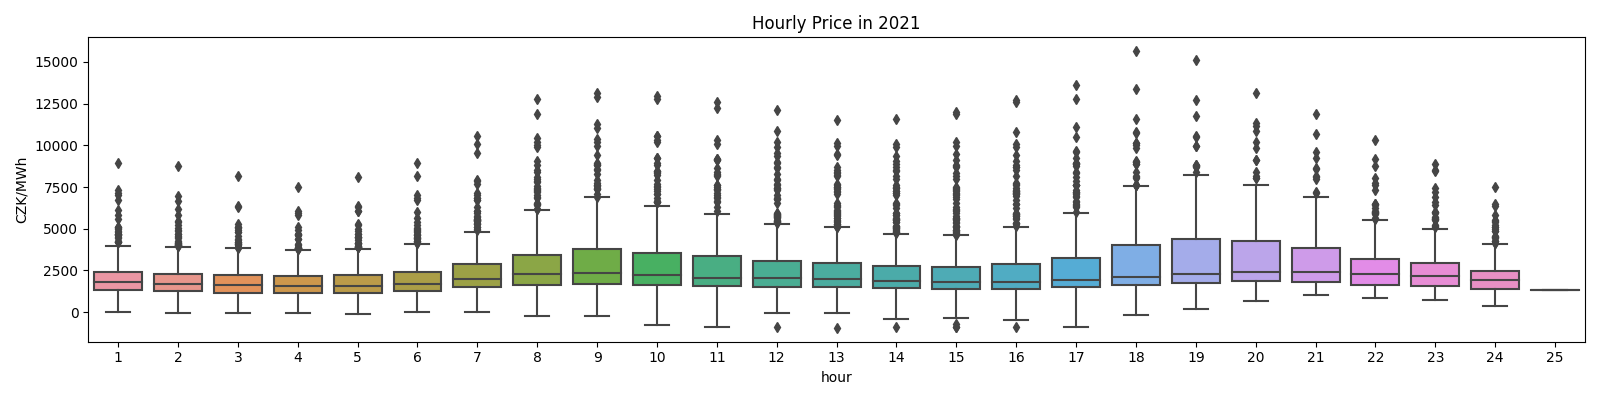

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(16, 4))
sns.boxplot(data=df, x='hour', y='price')
ax.set_title('Hourly Price in 2021')
ax.set_ylabel('CZK/MWh')
fig.tight_layout()

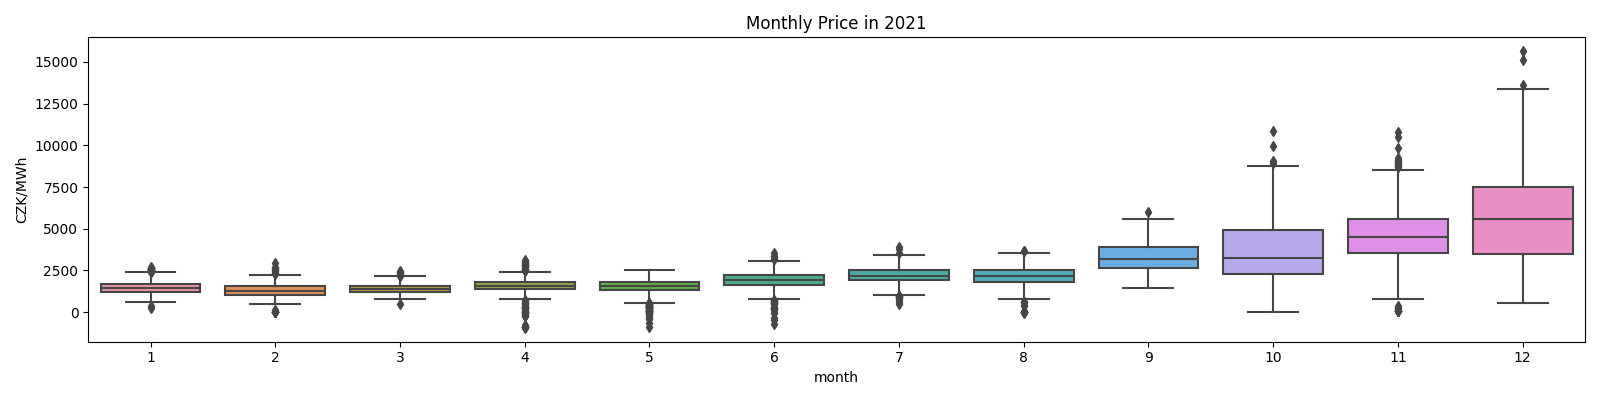

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(16, 4))
sns.boxplot(data=df, x='month', y='price')
ax.set_title('Monthly Price in 2021')
ax.set_ylabel('CZK/MWh')
fig.tight_layout()

In [6]:
capacity = 12.6 * 0.8  # kWh
pricedif = 0.7  # CZK/kWh
repeatsperday = 2

equipment_price = 172000 - 126000  # CZK
breakeven_days = equipment_price/(capacity * pricedif * repeatsperday)
print(f'Breakeven in {breakeven_days/365:.1f} years')

Breakeven in 8.9 years
